Index(['Number Biosimilars', 'per_capita_gdp', 'per_capita_mmkt_size',
       'country_lvl_percent_growth', 'Market share bio', 'market share top4',
       'No. of products', 'HHI', 'Market share top 2',
       'per capita percent growth', 'Populatio', 'mkt_size'],
      dtype='object')
[[ 1.          0.03381764 -0.10821651  0.88721687 -0.22104773  0.32734083]
 [ 0.03381764  1.          0.37601676 -0.05580201  0.4929616  -0.46205635]
 [-0.10821651  0.37601676  1.          0.05090936  0.70900561 -0.54107989]
 [ 0.88721687 -0.05580201  0.05090936  1.         -0.05992662  0.15299881]
 [-0.22104773  0.4929616   0.70900561 -0.05992662  1.         -0.7643113 ]
 [ 0.32734083 -0.46205635 -0.54107989  0.15299881 -0.7643113   1.        ]]
Cluster 1
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']
Cluster 2
['Argentina', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 'Hungary', 'Israel', 'Italy', 'Kuwait', 'Malaysia', 'Mexico', 'New Zealand', 'Paraguay', 'Puerto Rico', 'Slovakia', 'South Africa', '

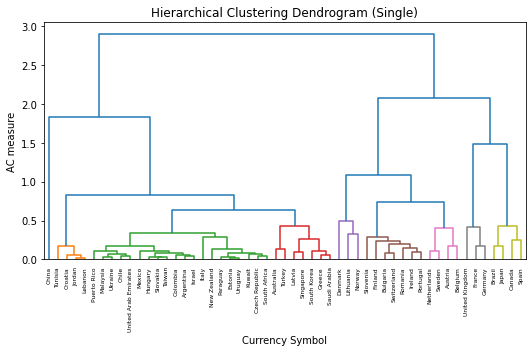

Cluster 0
['Croatia', 'Czech Republic', 'Estonia', 'Jordan', 'Kuwait', 'Lebanon', 'New Zealand', 'Paraguay', 'South Africa', 'Tunisia', 'Uruguay']
Cluster 1
['Belgium', 'Bulgaria', 'Finland', 'Ireland', 'Portugal', 'Romania', 'Slovenia', 'Switzerland']
Cluster 2
['France', 'Germany', 'United Kingdom']
Cluster 3
['China']
Cluster 4
['Brazil', 'Canada', 'Japan', 'Spain']
Cluster 5
['Austria', 'Lithuania', 'Netherlands', 'Sweden']
Cluster 6
['Denmark', 'Norway']
Cluster 7
['Argentina', 'Australia', 'Chile', 'Colombia', 'Greece', 'Hungary', 'Israel', 'Italy', 'Latvia', 'Malaysia', 'Mexico', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Korea', 'Taiwan', 'Turkey', 'Ukraine', 'United Arab Emirates']


NameError: name 'get_cluster_classes' is not defined

In [24]:
cpdf = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf.set_index( 'country', inplace=True )

cpdf1 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf1.set_index( 'country', inplace=True )

cpdf2 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf2.set_index( 'country', inplace=True )

cpdf_o = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf_o.set_index( 'country', inplace=True )

from sklearn import preprocessing

print(cpdf.columns)

cpdf = cpdf.loc[:, [ 'Populatio', 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf1 = cpdf1.loc[:, [ 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf2 = cpdf2.loc[:, [ 'per_capita_mmkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf3 = cpdf3.loc[:, [ 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
#cpdf4 = cpdf2.loc[:, [ #'gdp'#,'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]

print( np.corrcoef( cpdf.T.values ) )

'''
       [[ 1.       ,  0.03381764, -0.10821651,  0.88721687, -0.22104773,0.32734083],
       [ 0.03381764,  1.        ,  0.37601676, -0.05580201,  0.4929616 ,-0.46205635],
       [-0.10821651,  0.37601676,  1.        ,  0.05090936,  0.70900561,-0.54107989],
       [ 0.88721687, -0.05580201,  0.05090936,  1.        , -0.05992662,0.15299881],
       [-0.22104773,  0.4929616 ,  0.70900561, -0.05992662,  1.        ,-0.7643113 ],
       [ 0.32734083, -0.46205635, -0.54107989,  0.15299881, -0.7643113 ,1.        ]])
       
       High Corr:
       popu and percent_growth
       No. of products and HHI
'''


x = cpdf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cpdf = pd.DataFrame(x_scaled , index = cpdf.index)


# cpdf_2015 = copy.deepcopy( cpdf  )
cpdf_2015 = copy.deepcopy( cpdf )

# cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1] )

# cpdf_2015_2.max()
# 
# cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 
from sklearn import metrics

# metrics.pairwise.euclidean_distances?





# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf




# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 



distance_cut =  0.50
method = 'ward'

sdm = metrics.pairwise.euclidean_distances( cpdf_2015_2.values )
Dsqf = sqf(sdm, checks = False)
linkage_matrix = linkage(Dsqf, method)

from scipy.cluster.hierarchy import fcluster
max_d = distance_cut
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
clusters

cluster_methodology = 'HC_' + method + '_D=' + str(distance_cut)
cpdf_o[cluster_methodology] = clusters


# printing clusters
labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         


# plottting cluster
figure = plt.figure(figsize=(7.5, 5))
den = dendrogram(
    linkage_matrix,
    color_threshold= distance_cut,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans
import numpy as np

for rs in range(6):
    kmeans = KMeans(n_clusters=8, random_state=rs).fit(cpdf_2015_2.values)
    kmeans.labels_
    
    # kmeans.predict([[0, 0], [12, 3]])
    
    kmeans.cluster_centers_
    
    
    clusters =  kmeans.labels_
    
    cluster_methodology = 'Kmeans_'  + 'initialisation=' + str(rs)
    cpdf_o[cluster_methodology] = clusters



cpdf_o.to_csv( 'country_lvl_agregate_10features_based_clusters.csv' )

labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         



rt = get_cluster_classes(den)

for k, v in rt.items():
    print('Cluster {}'.format(k))
    print(v)



[den['color_list'],den['ivl']]

pd.DataFrame( den['color_list'],den['ivl'] )

cpdf_2015 = copy.deepcopy( cpdf[ cpdf.index >= '2020-01-01' ] )

# # cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1].T )

cpdf_2015_2.max()

cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 

# sklearn.metrics.pairwise.euclidean_distances?


sdm = sklearn.metrics.pairwise.euclidean_distances( cpdf_2015_2_nm.values )


# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf



Dsqf = sqf(sdm, checks = False)
# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 

sdm
linkage_matrix = linkage(Dsqf, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt

Index(['Number Biosimilars', 'per_capita_gdp', 'per_capita_mmkt_size',
       'country_lvl_percent_growth', 'Market share bio', 'market share top4',
       'No. of products', 'HHI', 'Market share top 2',
       'per capita percent growth', 'Populatio', 'mkt_size'],
      dtype='object')
[[ 1.          0.37601676 -0.05580201  0.4929616  -0.46205635]
 [ 0.37601676  1.          0.05090936  0.70900561 -0.54107989]
 [-0.05580201  0.05090936  1.         -0.05992662  0.15299881]
 [ 0.4929616   0.70900561 -0.05992662  1.         -0.7643113 ]
 [-0.46205635 -0.54107989  0.15299881 -0.7643113   1.        ]]
Cluster 1
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']
Cluster 2
['Argentina', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 'Hungary', 'Israel', 'Italy', 'Kuwait', 'Malaysia', 'Mexico', 'New Zealand', 'Paraguay', 'Puerto Rico', 'Slovakia', 'South Africa', 'Taiwan', 'Ukraine', 'United Arab Emirates', 'Uruguay']
Cluster 3
['Australia', 'Greece', 'Latvia', 'Saudi Arabia', 'Singapore', 'South 

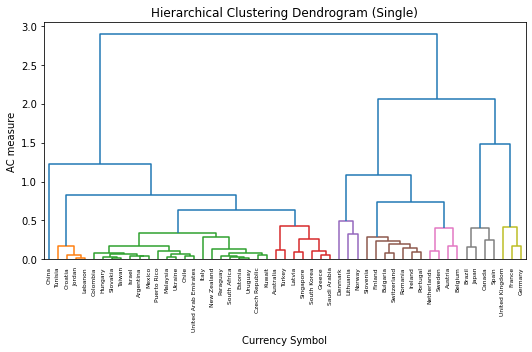

Cluster 0
['Argentina', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 'Hungary', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Malaysia', 'Mexico', 'New Zealand', 'Paraguay', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'Slovakia', 'South Africa', 'Taiwan', 'Ukraine', 'United Arab Emirates', 'Uruguay']
Cluster 1
['France', 'Germany', 'United Kingdom']
Cluster 2
['Austria', 'Belgium', 'Lithuania', 'Netherlands', 'Sweden']
Cluster 3
['Brazil', 'Canada', 'Japan', 'Spain']
Cluster 4
['Denmark', 'Norway']
Cluster 5
['China']
Cluster 6
['Australia', 'Bulgaria', 'Finland', 'Greece', 'Ireland', 'Portugal', 'Romania', 'Slovenia', 'South Korea', 'Switzerland', 'Turkey']
Cluster 7
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']


NameError: name 'get_cluster_classes' is not defined

In [22]:
cpdf = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf.set_index( 'country', inplace=True )

cpdf1 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf1.set_index( 'country', inplace=True )

cpdf2 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf2.set_index( 'country', inplace=True )

cpdf_o = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf_o.set_index( 'country', inplace=True )

from sklearn import preprocessing

print(cpdf.columns)

cpdf = cpdf.loc[:, [ 'Populatio', 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf1 = cpdf1.loc[:, [ 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf2 = cpdf2.loc[:, [ 'per_capita_mmkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]


print( np.corrcoef( cpdf1.T.values ) )

'''
       [[ 1.       ,  0.03381764, -0.10821651,  0.88721687, -0.22104773,0.32734083],
       [ 0.03381764,  1.        ,  0.37601676, -0.05580201,  0.4929616 ,-0.46205635],
       [-0.10821651,  0.37601676,  1.        ,  0.05090936,  0.70900561,-0.54107989],
       [ 0.88721687, -0.05580201,  0.05090936,  1.        , -0.05992662,0.15299881],
       [-0.22104773,  0.4929616 ,  0.70900561, -0.05992662,  1.        ,-0.7643113 ],
       [ 0.32734083, -0.46205635, -0.54107989,  0.15299881, -0.7643113 ,1.        ]])
       
       High Corr:
       popu and percent_growth
       No. of products and HHI
'''


x = cpdf1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cpdf1 = pd.DataFrame(x_scaled , index = cpdf1.index)


# cpdf_2015 = copy.deepcopy( cpdf  )
cpdf_2015 = copy.deepcopy( cpdf1 )

# cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1] )

# cpdf_2015_2.max()
# 
# cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 
from sklearn import metrics

# metrics.pairwise.euclidean_distances?





# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf




# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 



distance_cut =  0.50
method = 'ward'

sdm = metrics.pairwise.euclidean_distances( cpdf_2015_2.values )
Dsqf = sqf(sdm, checks = False)
linkage_matrix = linkage(Dsqf, method)

from scipy.cluster.hierarchy import fcluster
max_d = distance_cut
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
clusters

cluster_methodology = 'HC_' + method + '_D=' + str(distance_cut)
cpdf_o[cluster_methodology] = clusters


# printing clusters
labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         


# plottting cluster
figure = plt.figure(figsize=(7.5, 5))
den = dendrogram(
    linkage_matrix,
    color_threshold= distance_cut,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans
import numpy as np

for rs in range(6):
    kmeans = KMeans(n_clusters=8, random_state=rs).fit(cpdf_2015_2.values)
    kmeans.labels_
    
    # kmeans.predict([[0, 0], [12, 3]])
    
    kmeans.cluster_centers_
    
    
    clusters =  kmeans.labels_
    
    cluster_methodology = 'Kmeans_'  + 'initialisation=' + str(rs)
    cpdf_o[cluster_methodology] = clusters



cpdf_o.to_csv( 'country_lvl_agregate_10features_based_clusters.csv' )

labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         



rt = get_cluster_classes(den)

for k, v in rt.items():
    print('Cluster {}'.format(k))
    print(v)



[den['color_list'],den['ivl']]

pd.DataFrame( den['color_list'],den['ivl'] )

cpdf_2015 = copy.deepcopy( cpdf[ cpdf.index >= '2020-01-01' ] )

# # cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1].T )

cpdf_2015_2.max()

cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 

# sklearn.metrics.pairwise.euclidean_distances?


sdm = sklearn.metrics.pairwise.euclidean_distances( cpdf_2015_2_nm.values )


# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf



Dsqf = sqf(sdm, checks = False)
# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 

sdm
linkage_matrix = linkage(Dsqf, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()

Index(['Number Biosimilars', 'per_capita_gdp', 'per_capita_mmkt_size',
       'country_lvl_percent_growth', 'Market share bio', 'market share top4',
       'No. of products', 'HHI', 'Market share top 2',
       'per capita percent growth', 'Populatio', 'mkt_size'],
      dtype='object')
[[ 1.          0.59738599  0.02583063  0.69152045 -0.56114873]
 [ 0.59738599  1.          0.05090936  0.70900561 -0.54107989]
 [ 0.02583063  0.05090936  1.         -0.05992662  0.15299881]
 [ 0.69152045  0.70900561 -0.05992662  1.         -0.7643113 ]
 [-0.56114873 -0.54107989  0.15299881 -0.7643113   1.        ]]
Cluster 1
['Greece', 'Hungary', 'Israel', 'Japan', 'Kuwait', 'New Zealand', 'Puerto Rico', 'Slovakia']
Cluster 2
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']
Cluster 3
['Latvia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Turkey']
Cluster 4
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 'Italy', 'Malaysia', 'Mexico', 'Paraguay', 'South Africa', 'Taiwan', 'Ukraine', 

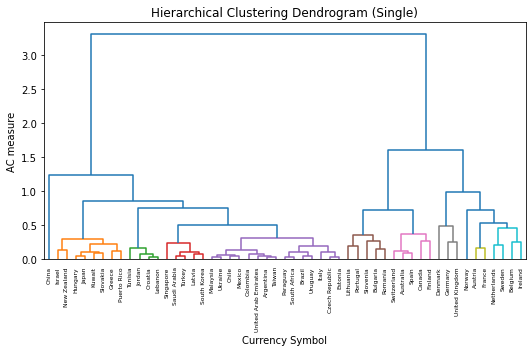

Cluster 0
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Croatia', 'Czech Republic', 'Estonia', 'Italy', 'Jordan', 'Latvia', 'Lebanon', 'Malaysia', 'Mexico', 'Paraguay', 'Saudi Arabia', 'Singapore', 'South Africa', 'Taiwan', 'Tunisia', 'Ukraine', 'United Arab Emirates', 'Uruguay']
Cluster 1
['Bulgaria', 'Lithuania', 'Portugal', 'Romania', 'Slovenia']
Cluster 2
['Austria', 'France', 'Germany']
Cluster 3
['Denmark', 'United Kingdom']
Cluster 4
['Netherlands', 'Norway', 'Sweden']
Cluster 5
['China']
Cluster 6
['Belgium', 'Canada', 'Finland', 'Ireland']
Cluster 7
['Australia', 'Greece', 'Hungary', 'Israel', 'Japan', 'Kuwait', 'New Zealand', 'Puerto Rico', 'Slovakia', 'South Korea', 'Spain', 'Switzerland', 'Turkey']


NameError: name 'get_cluster_classes' is not defined

In [23]:
cpdf = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf.set_index( 'country', inplace=True )

cpdf1 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf1.set_index( 'country', inplace=True )

cpdf2 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf2.set_index( 'country', inplace=True )

cpdf_o = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf_o.set_index( 'country', inplace=True )

from sklearn import preprocessing

print(cpdf.columns)

cpdf = cpdf.loc[:, [ 'Populatio', 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf1 = cpdf1.loc[:, [ 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf2 = cpdf2.loc[:, [ 'per_capita_mmkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]


print( np.corrcoef( cpdf2.T.values ) )

'''
       [[ 1.       ,  0.03381764, -0.10821651,  0.88721687, -0.22104773,0.32734083],
       [ 0.03381764,  1.        ,  0.37601676, -0.05580201,  0.4929616 ,-0.46205635],
       [-0.10821651,  0.37601676,  1.        ,  0.05090936,  0.70900561,-0.54107989],
       [ 0.88721687, -0.05580201,  0.05090936,  1.        , -0.05992662,0.15299881],
       [-0.22104773,  0.4929616 ,  0.70900561, -0.05992662,  1.        ,-0.7643113 ],
       [ 0.32734083, -0.46205635, -0.54107989,  0.15299881, -0.7643113 ,1.        ]])
       
       High Corr:
       popu and percent_growth
       No. of products and HHI
'''


x = cpdf2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cpdf2 = pd.DataFrame(x_scaled , index = cpdf2.index)


# cpdf_2015 = copy.deepcopy( cpdf  )
cpdf_2015 = copy.deepcopy( cpdf2 )

# cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1] )

# cpdf_2015_2.max()
# 
# cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 
from sklearn import metrics

# metrics.pairwise.euclidean_distances?





# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf




# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 



distance_cut =  0.50
method = 'ward'

sdm = metrics.pairwise.euclidean_distances( cpdf_2015_2.values )
Dsqf = sqf(sdm, checks = False)
linkage_matrix = linkage(Dsqf, method)

from scipy.cluster.hierarchy import fcluster
max_d = distance_cut
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
clusters

cluster_methodology = 'HC_' + method + '_D=' + str(distance_cut)
cpdf_o[cluster_methodology] = clusters


# printing clusters
labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         


# plottting cluster
figure = plt.figure(figsize=(7.5, 5))
den = dendrogram(
    linkage_matrix,
    color_threshold= distance_cut,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans
import numpy as np


K = range(1,10)
for k 
for rs in range(6):
    kmeans = KMeans(n_clusters=8, random_state=rs).fit(cpdf_2015_2.values)
    kmeans.labels_
    
    # kmeans.predict([[0, 0], [12, 3]])
    
    kmeans.cluster_centers_
    
    
    clusters =  kmeans.labels_
    
    cluster_methodology = 'Kmeans_'  + 'initialisation=' + str(rs)
    cpdf_o[cluster_methodology] = clusters



cpdf_o.to_csv( 'country_lvl_agregate_10features_based_clusters.csv' )

labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         



rt = get_cluster_classes(den)

for k, v in rt.items():
    print('Cluster {}'.format(k))
    print(v)



[den['color_list'],den['ivl']]

pd.DataFrame( den['color_list'],den['ivl'] )

cpdf_2015 = copy.deepcopy( cpdf[ cpdf.index >= '2020-01-01' ] )

# # cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1].T )

cpdf_2015_2.max()

cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 

# sklearn.metrics.pairwise.euclidean_distances?


sdm = sklearn.metrics.pairwise.euclidean_distances( cpdf_2015_2_nm.values )


# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf



Dsqf = sqf(sdm, checks = False)
# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 

sdm
linkage_matrix = linkage(Dsqf, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()

In [ ]:
K = range(1,10)

for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(cpdf_2015_2.values) 
    kmeanModel.fit(cpdf_2015_2.values)     
    distortions.append(sum(np.min(cdist(cpdf_2015_2.values, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cpdf_2015_2.values.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cpdf_2015_2.values, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cpdf_2015_2.values.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [ ]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

Index(['Number Biosimilars', 'per_capita_gdp', 'per_capita_mmkt_size',
       'country_lvl_percent_growth', 'Market share bio', 'market share top4',
       'No. of products', 'HHI', 'Market share top 2',
       'per capita percent growth', 'Populatio', 'mkt_size'],
      dtype='object')
[[ 1.          0.05090936  0.70900561 -0.54107989]
 [ 0.05090936  1.         -0.05992662  0.15299881]
 [ 0.70900561 -0.05992662  1.         -0.7643113 ]
 [-0.54107989  0.15299881 -0.7643113   1.        ]]
Cluster 1
['Denmark', 'Norway', 'United Kingdom']
Cluster 2
['Belgium', 'Finland', 'Ireland', 'Portugal', 'Romania', 'Slovenia']
Cluster 3
['Austria', 'France', 'Germany', 'Lithuania', 'Netherlands', 'Sweden']
Cluster 4
['Australia', 'Bulgaria', 'Canada', 'Greece', 'Latvia', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Switzerland', 'Turkey']
Cluster 5
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']
Cluster 6
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 

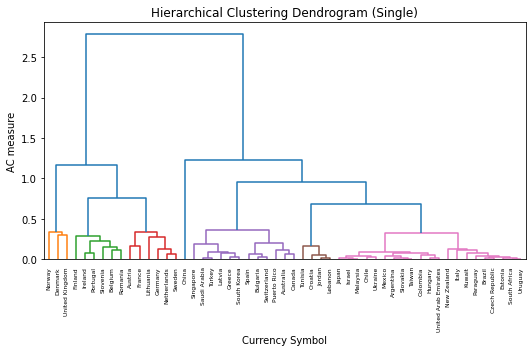

Cluster 0
['Argentina', 'Brazil', 'Chile', 'Colombia', 'Czech Republic', 'Estonia', 'Hungary', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Malaysia', 'Mexico', 'New Zealand', 'Paraguay', 'Slovakia', 'South Africa', 'Taiwan', 'Ukraine', 'United Arab Emirates', 'Uruguay']
Cluster 1
['Lithuania', 'Norway']
Cluster 2
['China']
Cluster 3
['Belgium', 'Bulgaria', 'Finland', 'Ireland', 'Portugal', 'Romania', 'Slovenia', 'Switzerland']
Cluster 4
['Austria', 'France', 'Germany', 'Netherlands', 'Sweden']
Cluster 5
['Denmark', 'United Kingdom']
Cluster 6
['Australia', 'Canada', 'Greece', 'Latvia', 'Puerto Rico', 'Saudi Arabia', 'Singapore', 'South Korea', 'Spain', 'Turkey']
Cluster 7
['Croatia', 'Jordan', 'Lebanon', 'Tunisia']


NameError: name 'get_cluster_classes' is not defined

In [26]:
cpdf = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf.set_index( 'country', inplace=True )

cpdf1 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf1.set_index( 'country', inplace=True )

cpdf2 = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf2.set_index( 'country', inplace=True )

cpdf_o = pd.read_csv( 'country_lvl_agregate_10features_.csv', header = 0 ).iloc[:,2:]
cpdf_o.set_index( 'country', inplace=True )

from sklearn import preprocessing

print(cpdf.columns)

cpdf = cpdf.loc[:, [ 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf1 = cpdf1.loc[:, [ 'mkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf2 = cpdf2.loc[:, [ 'per_capita_mmkt_size', 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
cpdf3 = cpdf2.loc[:, [ 'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]
#cpdf4 = cpdf2.loc[:, [ #'gdp'#,'Market share bio', 'country_lvl_percent_growth', 'No. of products', 'HHI']]

print( np.corrcoef( cpdf.T.values ) )

'''
       [[ 1.       ,  0.03381764, -0.10821651,  0.88721687, -0.22104773,0.32734083],
       [ 0.03381764,  1.        ,  0.37601676, -0.05580201,  0.4929616 ,-0.46205635],
       [-0.10821651,  0.37601676,  1.        ,  0.05090936,  0.70900561,-0.54107989],
       [ 0.88721687, -0.05580201,  0.05090936,  1.        , -0.05992662,0.15299881],
       [-0.22104773,  0.4929616 ,  0.70900561, -0.05992662,  1.        ,-0.7643113 ],
       [ 0.32734083, -0.46205635, -0.54107989,  0.15299881, -0.7643113 ,1.        ]])
       
       High Corr:
       popu and percent_growth
       No. of products and HHI
'''


x = cpdf.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
cpdf = pd.DataFrame(x_scaled , index = cpdf.index)


# cpdf_2015 = copy.deepcopy( cpdf  )
cpdf_2015 = copy.deepcopy( cpdf )

# cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1] )

# cpdf_2015_2.max()
# 
# cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 
from sklearn import metrics

# metrics.pairwise.euclidean_distances?





# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf




# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 



distance_cut =  0.50
method = 'ward'

sdm = metrics.pairwise.euclidean_distances( cpdf_2015_2.values )
Dsqf = sqf(sdm, checks = False)
linkage_matrix = linkage(Dsqf, method)

from scipy.cluster.hierarchy import fcluster
max_d = distance_cut
clusters = fcluster(linkage_matrix, max_d, criterion='distance')
clusters

cluster_methodology = 'HC_' + method + '_D=' + str(distance_cut)
cpdf_o[cluster_methodology] = clusters


# printing clusters
labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         


# plottting cluster
figure = plt.figure(figsize=(7.5, 5))
den = dendrogram(
    linkage_matrix,
    color_threshold= distance_cut,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()


from sklearn.cluster import KMeans
import numpy as np

for rs in range(6):
    kmeans = KMeans(n_clusters=8, random_state=rs).fit(cpdf_2015_2.values)
    kmeans.labels_
    
    # kmeans.predict([[0, 0], [12, 3]])
    
    kmeans.cluster_centers_
    
    
    clusters =  kmeans.labels_
    
    cluster_methodology = 'Kmeans_'  + 'initialisation=' + str(rs)
    cpdf_o[cluster_methodology] = clusters



cpdf_o.to_csv( 'country_lvl_agregate_10features_based_clusters.csv' )

labels = cpdf_2015_2.index

max(clusters)
min(clusters)

dic_cluster = {}

for i in range( min(clusters), max(clusters)+1):
    dic_cluster[i] = []
    for inx,v in enumerate(clusters):
        if v == i:
            dic_cluster[i].append( labels[inx] )
            
            
for k, v in dic_cluster.items():
    print('Cluster {}'.format(k))
    print(v)         



rt = get_cluster_classes(den)

for k, v in rt.items():
    print('Cluster {}'.format(k))
    print(v)



[den['color_list'],den['ivl']]

pd.DataFrame( den['color_list'],den['ivl'] )

cpdf_2015 = copy.deepcopy( cpdf[ cpdf.index >= '2020-01-01' ] )

# # cpdf_2015.to_csv( 'combined_features_2015onwards.csv' )


cpdf_2015

cpdf_2015_2 = copy.deepcopy(  cpdf_2015.iloc[:,:-1].T )

cpdf_2015_2.max()

cpdf_2015_2_nm = cpdf_2015_2/cpdf_2015_2.max()

import sklearn 

# sklearn.metrics.pairwise.euclidean_distances?


sdm = sklearn.metrics.pairwise.euclidean_distances( cpdf_2015_2_nm.values )


# dm0 = pd.read_csv(fl , header=0 , sep = ' ')

    
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform as sqf



Dsqf = sqf(sdm, checks = False)
# Dsqf = sqf(dm0.values )
# print ( sdm.values - sdm.values.transpose()) 

sdm
linkage_matrix = linkage(Dsqf, 'ward')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
    labels = cpdf_2015_2.index
)
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('Currency Symbol')
plt.ylabel('AC measure')
plt.tight_layout()
plt.show()